In [74]:
# execute this cell before you start

import tensorflow as tf
from tensorflow.keras import layers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

print(tf.VERSION)
print(tf.keras.__version__)


1.12.0
2.1.6-tf


#  CA4
## due on 02/04/2019

to submit the assignment, please do the following:

- do `Cell -> All output -> Clear` to clear all your output
- save the notebook (CA3.ipynb)

# The Boston Housing Data

Consider the data in  `keras.datasets.boston_housing`. In this case, there are only about 400 training datasets, where each dataset consists of 13 input values which are characteristic for a given property. The output corresponds to the property price. The meaning of the various columns is explained in https://www.kaggle.com/c/boston-housing.

In contrast to the previous examples, which were categorisation problems, this is now a regression problem. The challenge is to train a network, which is able to predict the price of the property. 

You will again find lots of examples on the internet, and it is okay to use inspiration as long as you provide the source. 

Adhere to the following rules:

- Train the network on the logarithm of the price, not on the price itself. Explain why this makes sense. 
- You will find many examples, which use `sci-kit learn` or other packages, which we did not do in the course. Do not use them, and restrict yourself to methods and libraries which we covered
- Try to find a network, which has the smallest amount of trainable parameters, while still providing good predictions of the price.  Discuss, how small you can go. 
- Once you have trained the network, explore the correlations which this network predicts:
    - Which inputs have a positive price correlation? 
    - Which inputs have a negative price correlation? 
    - Which inputs have little/no influence on the price?
    
  Investigate this by feeding into the network some artificial data, which you obtain from the testing data by varying one of the input columns.
  
  
Optional challenge (no extra points but extra insight!):

Compare the results with standard regression methods, for example as in ST4060/ST4061 in case you have covered them. 



In [75]:
(train_x, train_y), (test_x, test_y) = keras.datasets.boston_housing.load_data()

# from https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
var_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
             'DIS', 'RAD', 'TAX', 'PTRATIO', 'BLACK', 'LSTAT', 'MEDV']

In [76]:
# plt.scatter(range(1, len(train_y) + 1), train_y)

In [77]:
# log_train_y = np.log(train_y)
# log_test_y = np.log(test_y)

Method to print first n entries in the training data

In [78]:
def printFirstN(n):
    print(("{:8}"*len(var_names)).format(*var_names))
    for i in range(10):
        print(("{:<8.4}"*len(train_x[i])).format(*train_x[i]),
         "{:<8.3}".format(train_y[i]))

In [79]:
#Explore the data
print('Train X shape', train_x.shape)
print('Train Y shape', train_y.shape)
print('Test X shape', test_x.shape)
print('Train Y shape', test_y.shape)
print()

#inspect a few elements to get an idea of the data

printFirstN(10)

    

Train X shape (404, 13)
Train Y shape (404,)
Test X shape (102, 13)
Train Y shape (102,)

CRIM    ZN      INDUS   CHAS    NOX     RM      AGE     DIS     RAD     TAX     PTRATIO BLACK   LSTAT   MEDV    
1.232   0.0     8.14    0.0     0.538   6.142   91.7    3.977   4.0     307.0   21.0    396.9   18.72    15.2    
0.02177 82.5    2.03    0.0     0.415   7.61    15.7    6.27    2.0     348.0   14.7    395.4   3.11     42.3    
4.898   0.0     18.1    0.0     0.631   4.97    100.0   1.333   24.0    666.0   20.2    375.5   3.26     50.0    
0.03961 0.0     5.19    0.0     0.515   6.037   34.5    5.985   5.0     224.0   20.2    396.9   8.01     21.1    
3.693   0.0     18.1    0.0     0.713   6.376   88.4    2.567   24.0    666.0   20.2    391.4   14.65    17.7    
0.2839  0.0     7.38    0.0     0.493   5.708   74.3    4.721   5.0     287.0   19.6    391.1   11.74    18.5    
9.187   0.0     18.1    0.0     0.7     5.536   100.0   1.58    24.0    666.0   20.2    396.9   23.6     11.3    

It looks like the values of each predictor are very different in scale when compared to each other.
This may lead to difficulties in building a good enough model.
Hence scale them uniformly.

In [80]:
# train_x = (train_x - train_x.min(axis=0)) / (train_x.max(axis=0) - train_x.min(axis=0))
# test_x = (test_x - test_x.min(axis=0)) / (test_x.max(axis=0) - test_x.min(axis=0))

In [ ]:
# Scaling criteria from https://www.kaggle.com/shanekonaung/boston-housing-price-dataset-with-keras
mean = train_x.mean(axis=0)
train_x = train_x - mean
std = train_x.std(axis=0)
train_x = train_x/std

test_x = test_x-mean
test_x = test_x/std

In [81]:
printFirstN(10)

CRIM    ZN      INDUS   CHAS    NOX     RM      AGE     DIS     RAD     TAX     PTRATIO BLACK   LSTAT   MEDV    
1.232   0.0     8.14    0.0     0.538   6.142   91.7    3.977   4.0     307.0   21.0    396.9   18.72    15.2    
0.02177 82.5    2.03    0.0     0.415   7.61    15.7    6.27    2.0     348.0   14.7    395.4   3.11     42.3    
4.898   0.0     18.1    0.0     0.631   4.97    100.0   1.333   24.0    666.0   20.2    375.5   3.26     50.0    
0.03961 0.0     5.19    0.0     0.515   6.037   34.5    5.985   5.0     224.0   20.2    396.9   8.01     21.1    
3.693   0.0     18.1    0.0     0.713   6.376   88.4    2.567   24.0    666.0   20.2    391.4   14.65    17.7    
0.2839  0.0     7.38    0.0     0.493   5.708   74.3    4.721   5.0     287.0   19.6    391.1   11.74    18.5    
9.187   0.0     18.1    0.0     0.7     5.536   100.0   1.58    24.0    666.0   20.2    396.9   23.6     11.3    
4.097   0.0     19.58   0.0     0.871   5.468   100.0   1.412   5.0     403.0   14.7    3

In [83]:
%time

model = keras.models.Sequential()
model.add(keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(train_x.shape[1],)))
model.add(keras.layers.Dense(512, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mae'])

fit_result = model.fit(train_x, train_y, epochs=100, batch_size=1, validation_data=(test_x, test_y))


CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.39 µs
Train on 404 samples, validate on 102 samples
Epoch 1/100
404/404 [==============================] - 2s 4ms/step - loss: 50.3095 - mean_absolute_error: 4.4970 - val_loss: 38.1558 - val_mean_absolute_error: 4.6507
Epoch 2/100
404/404 [==============================] - 1s 3ms/step - loss: 19.2780 - mean_absolute_error: 3.0577 - val_loss: 38.1947 - val_mean_absolute_error: 4.6582
Epoch 3/100
404/404 [==============================] - 1s 3ms/step - loss: 15.8500 - mean_absolute_error: 2.9522 - val_loss: 24.0080 - val_mean_absolute_error: 3.3687
Epoch 4/100
404/404 [==============================] - 1s 4ms/step - loss: 15.1637 - mean_absolute_error: 2.7932 - val_loss: 20.1037 - val_mean_absolute_error: 3.1096
Epoch 5/100
404/404 [==============================] - 2s 4ms/step - loss: 13.3625 - mean_absolute_error: 2.5774 - val_loss: 17.0277 - val_mean_absolute_error: 2.7855
Epoch 6/100
404/404 [==============================

404/404 [==============================] - 2s 4ms/step - loss: 5.7513 - mean_absolute_error: 1.7247 - val_loss: 10.8557 - val_mean_absolute_error: 2.2706
Epoch 50/100
404/404 [==============================] - 2s 6ms/step - loss: 5.6872 - mean_absolute_error: 1.6500 - val_loss: 12.9421 - val_mean_absolute_error: 2.5898
Epoch 51/100
404/404 [==============================] - 2s 6ms/step - loss: 5.5464 - mean_absolute_error: 1.6649 - val_loss: 13.7464 - val_mean_absolute_error: 2.4430
Epoch 52/100
404/404 [==============================] - 2s 4ms/step - loss: 6.0361 - mean_absolute_error: 1.7420 - val_loss: 12.5360 - val_mean_absolute_error: 2.3360
Epoch 53/100
404/404 [==============================] - 2s 4ms/step - loss: 5.4592 - mean_absolute_error: 1.6347 - val_loss: 13.3135 - val_mean_absolute_error: 2.5687
Epoch 54/100
404/404 [==============================] - 2s 5ms/step - loss: 5.8270 - mean_absolute_error: 1.6728 - val_loss: 11.8394 - val_mean_absolute_error: 2.2590
Epoch 55/10

404/404 [==============================] - 2s 4ms/step - loss: 3.4227 - mean_absolute_error: 1.3638 - val_loss: 13.3473 - val_mean_absolute_error: 2.5356
Epoch 99/100
404/404 [==============================] - 2s 4ms/step - loss: 3.4197 - mean_absolute_error: 1.3722 - val_loss: 10.9520 - val_mean_absolute_error: 2.3194
Epoch 100/100
404/404 [==============================] - 2s 4ms/step - loss: 3.7563 - mean_absolute_error: 1.4275 - val_loss: 12.0048 - val_mean_absolute_error: 2.3858


In [85]:
history = fit_result.history

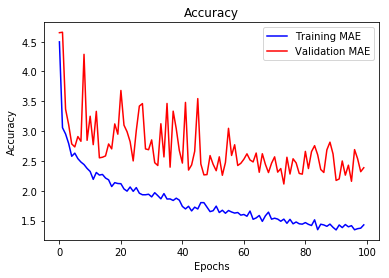

In [86]:
plt.plot(fit_result.epoch, history['mean_absolute_error'], 'b', label='Training MAE')
plt.plot(fit_result.epoch, history['val_mean_absolute_error'], 'r', label='Validation MAE')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

The plot says that although the training MAE goes down almost monotonously, the test MAE remains more or less constant after about 60 epochs. This hints that the model has been overfitted.

In [73]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
